Plot generation
======================

In [1]:
import pandas as pd
import config
from pathlib import Path
import numpy as np
import math
import itertools

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]


In [2]:
config.prj_path = Path("../").resolve()


In [3]:
config.res_folder

'/Users/rcabanas/GoogleDrive/IDSIA/causality/dev/idsia-papers/2020-EM-causal/experiments//results/'

In [4]:
files =  ["2020-10-07-15-53-48_tree.csv", "2020-10-07-16-56-38_poly.csv"]

# as non-converging solutions are not discarded, poly6 is not working well
# the rest are ok.
files = ["2020-10-10-01-50-57_poly.csv", "2020-10-10-00-41-56_tree.csv"]

# inside flag is included
files = ["2020-10-10-14-26-37_poly6.csv", "2020-10-10-13-24-58_poly4.csv", 
         "2020-10-10-13-17-58_tree6.csv", "2020-10-10-12-58-40_tree4.csv"]


# precise query included

files = ['2020-10-10-19-23-37_tree4.csv',
 '2020-10-10-19-43-03_tree6.csv',
 '2020-10-10-19-49-59_poly4.csv',
 '2020-10-10-20-50-53_poly6.csv']

# with time results
files = ['2020-10-11-12-07-29_tree4.csv','2020-10-11-12-26-38_tree6.csv','2020-10-11-12-33-33_poly4.csv','2020-10-11-13-34-29_poly6.csv']

# kl threshold set to 0.0000001 and 200 EM iterations (instead of 0.00001 and 100)


# lenght 8 and 10, em_iter = 100 and KL_threshold = 0.0000001

#files = ['2020-10-12-17-45-09_tree8.csv','2020-10-12-20-18-33_poly8.csv','2020-10-12-23-21-50_tree10.csv','2020-10-13-05-18-50_poly10.csv']

## with aproxLP
files = ['2020-10-13-12-53-01_tree6.csv', '2020-10-13-15-04-26_poly6.csv']

# results in the paper
files = ['2020-10-14-02-08-23_tree4.csv', '2020-10-14-02-15-22_poly4.csv', '2020-10-13-16-15-02_tree6.csv', '2020-10-13-17-51-36_poly6.csv', '2020-10-13-18-43-10_tree8.csv', '2020-10-13-19-58-31_poly8.csv', '2020-10-13-21-41-50_tree10.csv', '2020-10-14-01-57-35_poly10.csv']



In [5]:
results = pd.concat([pd.read_csv(f"{config.res_folder}/{f}", index_col=0) for f in files])
results = results.drop(columns=["numberPoints"])
# remove rows with -1
results = results[results.apply(lambda t: -1 not in t.values, axis=1)]

In [6]:
#results
error_model = results[results.apply(lambda t: -1 in t.values, axis=1)]["model"].values
error_model
#results = results[results.apply(lambda t: t["model"] not in error_model, axis=1)]

array([], dtype=object)

In [7]:
results

,model,Paplp0_lbound,Paplp0_ubound,Paplp1_lbound,Paplp1_ubound,Pcn0_lbound,Pcn0_ubound,Pcn1_lbound,Pcn1_ubound,Ptrue0_lbound,...,Puq1_lbound,Puq1_ubound,cn_time,em_iter,em_time,inside,num_points,precise0,precise1,uq_time
0,tree4_48362.uai,0.833100,0.83970,0.16030,0.166900,0.841093,0.841093,0.158907,0.158907,0.727500,...,0.158907,0.158907,4.362314,96.0,9611.0,1.0,1.0,0.841093,0.158907,2.155691
1,tree4_48362.uai,0.833100,0.83970,0.16030,0.166900,0.830383,0.851258,0.148742,0.169617,0.727500,...,0.158907,0.159452,5.723405,16.0,1426.0,1.0,2.0,0.840548,0.159452,0.264217
2,tree4_48362.uai,0.833100,0.83970,0.16030,0.166900,0.830381,0.851258,0.148742,0.169619,0.727500,...,0.158907,0.159452,5.302785,87.0,7747.0,1.0,3.0,0.840552,0.159448,0.272675
3,tree4_48362.uai,0.833100,0.83970,0.16030,0.166900,0.768383,0.910096,0.089904,0.231617,0.727500,...,0.158907,0.162612,4.623845,59.0,5233.0,1.0,4.0,0.837388,0.162612,0.216379
4,tree4_48362.uai,0.833100,0.83970,0.16030,0.166900,0.748028,0.931545,0.068455,0.251972,0.727500,...,0.157813,0.162612,6.826603,30.0,2639.0,1.0,5.0,0.842187,0.157813,0.286384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,poly10_55307.uai,0.778589,0.78194,0.21806,0.221411,0.765144,0.806462,0.193538,0.234856,0.771392,...,0.210485,0.216390,7672.000042,36.0,39250.0,1.0,16.0,0.787065,0.212935,4.604014
196,poly10_55307.uai,0.778589,0.78194,0.21806,0.221411,0.765144,0.806462,0.193538,0.234856,0.771392,...,0.210485,0.216390,8253.971561,51.0,55527.0,1.0,17.0,0.787109,0.212891,4.588328
197,poly10_55307.uai,0.778589,0.78194,0.21806,0.221411,0.765144,0.806462,0.193538,0.234856,0.771392,...,0.210485,0.216390,9405.551938,86.0,93783.0,1.0,18.0,0.785769,0.214231,4.690905
198,poly10_55307.uai,0.778589,0.78194,0.21806,0.221411,0.765144,0.806462,0.193538,0.234856,0.771392,...,0.210485,0.216390,11056.852508,48.0,52534.0,1.0,19.0,0.786466,0.213534,4.696550


In [8]:
results.columns

Index(['model', 'Paplp0_lbound', 'Paplp0_ubound', 'Paplp1_lbound',
       'Paplp1_ubound', 'Pcn0_lbound', 'Pcn0_ubound', 'Pcn1_lbound',
       'Pcn1_ubound', 'Ptrue0_lbound', 'Ptrue0_ubound', 'Ptrue1_lbound',
       'Ptrue1_ubound', 'Puq0_lbound', 'Puq0_ubound', 'Puq1_lbound',
       'Puq1_ubound', 'cn_time', 'em_iter', 'em_time', 'inside', 'num_points',
       'precise0', 'precise1', 'uq_time'],
      dtype='object')

In [9]:
def rmse_intervals(t,m):
    return math.sqrt(sum([math.pow(t[f"P{m}{i}_lbound"] - t[f"Ptrue{i}_lbound"],2) for i in (0,1)]))

In [10]:
results["rmse_cn"] = results.apply(lambda t: rmse_intervals(t, "cn"), axis=1)
results["rmse_uq"] = results.apply(lambda t: rmse_intervals(t, "uq"), axis=1)

In [11]:
results["struct"] = results.apply(lambda t: t["model"].split("_")[0], axis=1)
results["struct2"] = results.apply(lambda t: t["model"][:4], axis=1)

In [12]:
results

,model,Paplp0_lbound,Paplp0_ubound,Paplp1_lbound,Paplp1_ubound,Pcn0_lbound,Pcn0_ubound,Pcn1_lbound,Pcn1_ubound,Ptrue0_lbound,...,em_time,inside,num_points,precise0,precise1,uq_time,rmse_cn,rmse_uq,struct,struct2
0,tree4_48362.uai,0.833100,0.83970,0.16030,0.166900,0.841093,0.841093,0.158907,0.158907,0.727500,...,9611.0,1.0,1.0,0.841093,0.158907,2.155691,0.154151,0.154151,tree4,tree
1,tree4_48362.uai,0.833100,0.83970,0.16030,0.166900,0.830383,0.851258,0.148742,0.169617,0.727500,...,1426.0,1.0,2.0,0.840548,0.159452,0.264217,0.139388,0.153749,tree4,tree
2,tree4_48362.uai,0.833100,0.83970,0.16030,0.166900,0.830381,0.851258,0.148742,0.169619,0.727500,...,7747.0,1.0,3.0,0.840552,0.159448,0.272675,0.139386,0.153749,tree4,tree
3,tree4_48362.uai,0.833100,0.83970,0.16030,0.166900,0.768383,0.910096,0.089904,0.231617,0.727500,...,5233.0,1.0,4.0,0.837388,0.162612,0.216379,0.053951,0.151441,tree4,tree
4,tree4_48362.uai,0.833100,0.83970,0.16030,0.166900,0.748028,0.931545,0.068455,0.251972,0.727500,...,2639.0,1.0,5.0,0.842187,0.157813,0.286384,0.024710,0.150691,tree4,tree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,poly10_55307.uai,0.778589,0.78194,0.21806,0.221411,0.765144,0.806462,0.193538,0.234856,0.771392,...,39250.0,1.0,16.0,0.787065,0.212935,4.604014,0.018417,0.012224,poly10,poly
196,poly10_55307.uai,0.778589,0.78194,0.21806,0.221411,0.765144,0.806462,0.193538,0.234856,0.771392,...,55527.0,1.0,17.0,0.787109,0.212891,4.588328,0.018417,0.012224,poly10,poly
197,poly10_55307.uai,0.778589,0.78194,0.21806,0.221411,0.765144,0.806462,0.193538,0.234856,0.771392,...,93783.0,1.0,18.0,0.785769,0.214231,4.690905,0.018417,0.012224,poly10,poly
198,poly10_55307.uai,0.778589,0.78194,0.21806,0.221411,0.765144,0.806462,0.193538,0.234856,0.771392,...,52534.0,1.0,19.0,0.786466,0.213534,4.696550,0.018417,0.012224,poly10,poly


In [13]:
results["rmse_lp"] = results.apply(lambda t: rmse_intervals(t, "aplp"), axis=1)

<AxesSubplot:xlabel='num_points'>

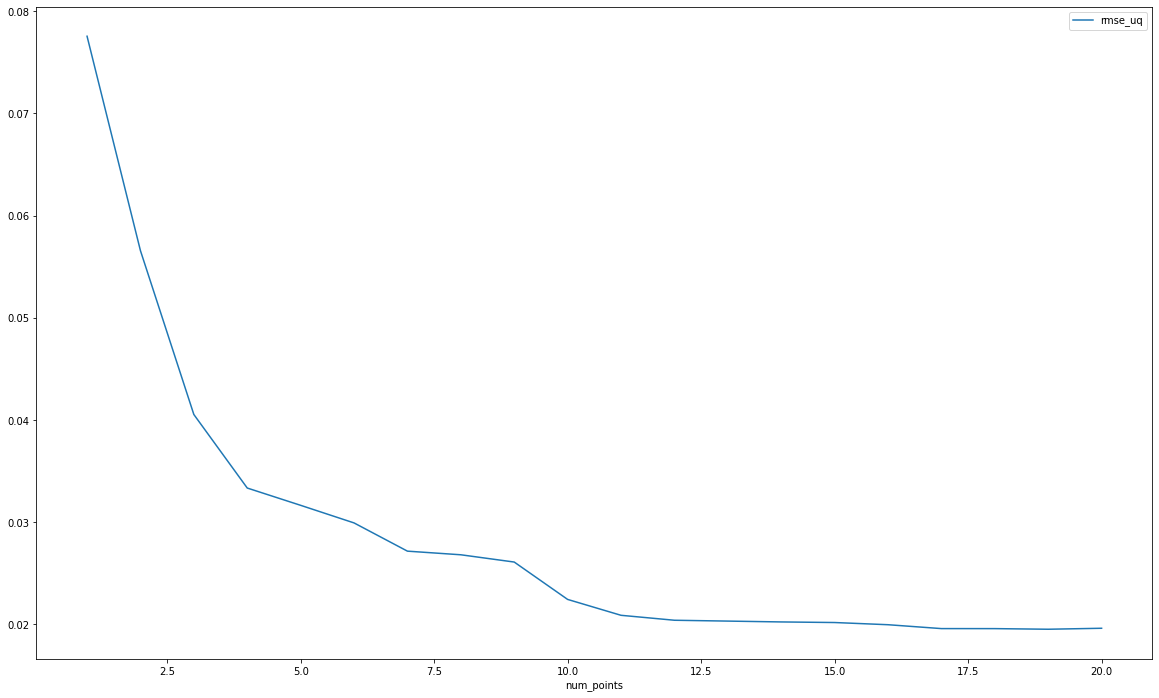

In [14]:
results.filter(["rmse_uq", "num_points"]).groupby(["num_points"], as_index=False).mean().plot(x="num_points")

In [15]:
data = pd.merge(
    results.filter(["rmse_cn", "num_points", "struct"]).groupby(["num_points", "struct"], as_index=False).mean(), 
    results.filter(["rmse_uq", "num_points", "struct"]).groupby(["num_points", "struct"], as_index=False).mean(), 
         on=["num_points", "struct"])

if "rmse_lp" in results.columns:
    data = pd.merge(
    data, 
    results.filter(["rmse_lp", "num_points", "struct"]).groupby(["num_points", "struct"], as_index=False).mean(), 
         on=["num_points", "struct"])

    
    
data2 = pd.merge(
    results.filter(["rmse_cn", "num_points", "struct2"]).groupby(["num_points", "struct2"], as_index=False).mean(), 
    results.filter(["rmse_uq", "num_points", "struct2"]).groupby(["num_points", "struct2"], as_index=False).mean(), 
         on=["num_points", "struct2"])

if "rmse_lp" in results.columns:
    data2 = pd.merge(
    data2, 
    results.filter(["rmse_lp", "num_points", "struct2"]).groupby(["num_points", "struct2"], as_index=False).mean(), 
         on=["num_points", "struct2"])    

In [16]:
def plot_rmse(data, m, ax=None, printdata=False, ylim=None):
    if "struct" in data.columns:
        plot_data = data.query(f"struct=='{m}'").filter(["num_points", "rmse_cn", "rmse_uq", "rmse_lp"])
    else:
        plot_data = data.query(f"struct2=='{m}'").filter(["num_points", "rmse_cn", "rmse_uq", "rmse_lp"])

    
    ax = plot_data.plot(x="num_points", title=m, ax=ax)
    if ylim is not None: 
        ax.set_ylim(0.0,ylim)
    if printdata:
        print(plot_data)
    return ax, plot_data

structs = np.unique(data["struct"].values)
structs2 = np.unique(data2["struct2"].values)



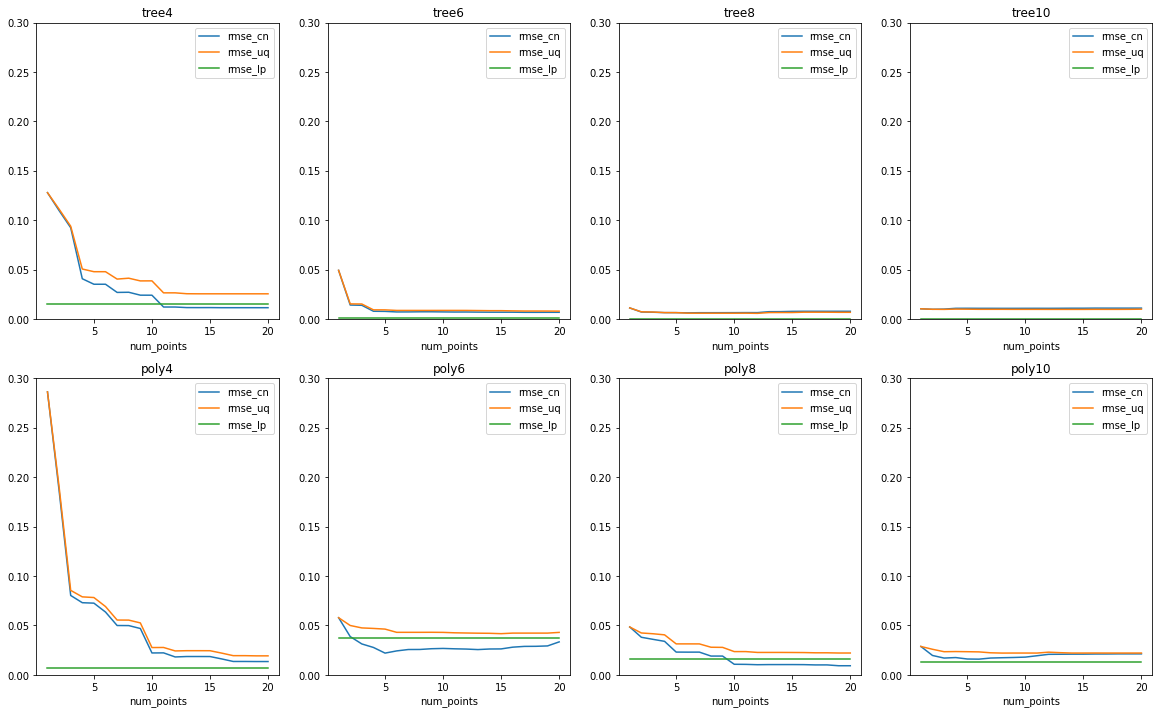

In [17]:



s = [x for x in ["tree4", "tree6", "tree8", "tree10", "poly4", "poly6", "poly8", "poly10" ] if x in structs]


fig, ax = plt.subplots(2,(int)(len(s)/2))

axs = ax.reshape(len(s),)

for i in range(len(s)):
    plot_rmse(data, s[i], axs[i], ylim=0.3)





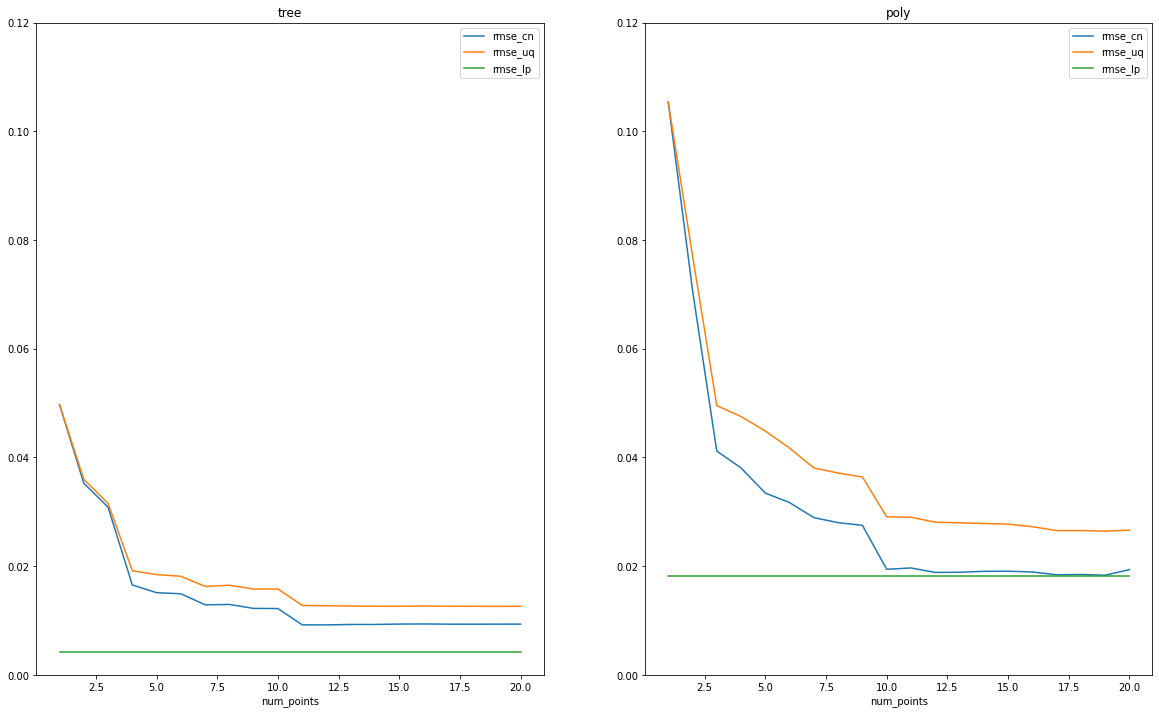

In [18]:

s = [x for x in ["tree", "poly"] if x in structs2]


fig, ax = plt.subplots((int)(len(s)/2),2)

axs = ax.reshape(len(s),)

plot_data = [0,0]

for i in range(len(s)):
    _,plot_data[i] = plot_rmse(data2, s[i], axs[i], ylim=0.12)

In [19]:
for s in ["rmse_uq", "rmse_cn", "rmse_lp"]:
    vals = plot_data[1][s].values
    for i in range(len(vals)):
        print(f"{i+1} {vals[i]}")
    print("")

1 0.10537341350026157
2 0.0771593549265972
3 0.04953168645317865
4 0.04752467189311187
5 0.044859721195009736
6 0.041715818779282376
7 0.038067130133529525
8 0.03713503756323487
9 0.03641189945185659
10 0.029085981779407955
11 0.02899844184742979
12 0.02808762538699073
13 0.027974794548898285
14 0.02785249045936846
15 0.027737252947712267
16 0.027265621575672992
17 0.02655109108453737
18 0.02655109108453737
19 0.026447359336504127
20 0.026625806899211374

1 0.10537341350026161
2 0.07078407931965203
3 0.04116955661942264
4 0.03807200311930919
5 0.03344414237004941
6 0.031695842850675324
7 0.028930561923597563
8 0.02800606608729267
9 0.027519678078495025
10 0.01942549232098144
11 0.019672245847687057
12 0.018849270510567707
13 0.0188790288895992
14 0.019051519975022267
15 0.019071591937209108
16 0.01893685724825491
17 0.01841496880812123
18 0.0184702119855277
19 0.018336065128141385
20 0.019362265439122558

1 0.018280991940032826
2 0.018280991940032826
3 0.018280991940032826
4 0.01828099

In [20]:
def rmse(t, x,y):
    #print([math.pow(t[x[i]]-t[y[i]],2) for i in range(len(x))])
    return math.sqrt(sum([math.pow(t[x[i]]-t[y[i]],2) for i in range(len(x))]))

def dist_interval(t):
    return min(rmse(t, ["precise0", "precise1"], ["Ptrue0_lbound", "Ptrue1_ubound"]), 
               rmse(t, ["precise0", "precise1"], ["Ptrue0_ubound", "Ptrue1_lbound"]))


results["dist_interval"] = results.apply(lambda t: dist_interval(t), axis=1)

In [21]:
N = results.shape[0]

In [22]:
# converged and inside
results.query("inside==1.0").query("em_iter<100").shape[0]/N

0.545

In [23]:
# converged and outside
df = results.query("inside==0.0").query("em_iter<100")
(df.shape[0]/N, df["dist_interval"].mean(), df["dist_interval"].max())



#t[["precise0", "precise1", "Ptrue0_lbound", "Ptrue1_ubound"]]

(0.455, 0.008251596015738043, 0.035578275110371864)

In [24]:
df[df["dist_interval"]>0.030]

,model,Paplp0_lbound,Paplp0_ubound,Paplp1_lbound,Paplp1_ubound,Pcn0_lbound,Pcn0_ubound,Pcn1_lbound,Pcn1_ubound,Ptrue0_lbound,...,num_points,precise0,precise1,uq_time,rmse_cn,rmse_uq,struct,struct2,rmse_lp,dist_interval
127,tree4_44696.uai,0.090600,0.114300,0.885700,0.909400,0.068516,0.102917,0.897083,0.931484,0.090600,...,8.0,0.068644,0.931356,0.310375,0.024845,0.024788,tree4,tree,1.249001e-16,0.031051
128,tree4_44696.uai,0.090600,0.114300,0.885700,0.909400,0.068421,0.102917,0.897083,0.931579,0.090600,...,9.0,0.068446,0.931554,0.406599,0.024929,0.024963,tree4,tree,1.249001e-16,0.031330
0,tree10_47451.uai,0.360162,0.360169,0.639831,0.639838,0.338644,0.338644,0.661356,0.661356,0.360162,...,1.0,0.338644,0.661356,2.737811,0.030436,0.030436,tree10,tree,1.110223e-16,0.030431
1,tree10_47451.uai,0.360162,0.360169,0.639831,0.639838,0.338543,0.338644,0.661356,0.661457,0.360162,...,2.0,0.338544,0.661456,0.923870,0.030507,0.030507,tree10,tree,1.110223e-16,0.030572
2,tree10_47451.uai,0.360162,0.360169,0.639831,0.639838,0.338535,0.338645,0.661355,0.661465,0.360162,...,3.0,0.338538,0.661462,0.548770,0.030512,0.030511,tree10,tree,1.110223e-16,0.030581
3,tree10_47451.uai,0.360162,0.360169,0.639831,0.639838,0.338509,0.338645,0.661355,0.661491,0.360162,...,4.0,0.338581,0.661419,0.674772,0.030530,0.030511,tree10,tree,1.110223e-16,0.030520
4,tree10_47451.uai,0.360162,0.360169,0.639831,0.639838,0.338397,0.338645,0.661355,0.661603,0.360162,...,5.0,0.338403,0.661597,0.559934,0.030610,0.030607,tree10,tree,1.110223e-16,0.030771
5,tree10_47451.uai,0.360162,0.360169,0.639831,0.639838,0.338173,0.338646,0.661354,0.661827,0.360162,...,6.0,0.338200,0.661800,0.588096,0.030769,0.030752,tree10,tree,1.110223e-16,0.031059
6,tree10_47451.uai,0.360162,0.360169,0.639831,0.639838,0.338173,0.338646,0.661354,0.661827,0.360162,...,7.0,0.338532,0.661468,0.572933,0.030769,0.030752,tree10,tree,1.110223e-16,0.030589
7,tree10_47451.uai,0.360162,0.360169,0.639831,0.639838,0.338173,0.338646,0.661354,0.661827,0.360162,...,8.0,0.338532,0.661468,0.791967,0.030769,0.030752,tree10,tree,1.110223e-16,0.030589
